In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_datos ="datasets/datos_corregidos_2.csv"
datos = pd.read_csv(file_datos)
datos

,latitude,longitude,height,distance,sum_distance,slope,date,utm_x,utm_y,velocidad_gps,consumo_total,consumo_inst,timestamp,ds,velocidad
0,-3.476898,-79.169502,2321.3,32.028551,32.028551,0.000000,2017/08/15 12:08:40,703350.750076,9.615497e+06,58.28,3091.96,13.25,1.502817e+09,2.0,16.014276
1,-3.477153,-79.169647,2321.3,32.489600,64.518152,0.000000,2017/08/15 12:08:42,703334.581834,9.615468e+06,58.60,3091.97,13.65,1.502817e+09,2.0,16.244800
2,-3.477430,-79.169754,2321.3,32.870444,97.388596,0.000000,2017/08/15 12:08:44,703322.631750,9.615438e+06,59.17,3091.98,13.75,1.502817e+09,2.0,16.435222
3,-3.477718,-79.169830,2321.3,32.960892,130.349487,0.000000,2017/08/15 12:08:46,703314.124281,9.615406e+06,59.91,3091.99,13.70,1.502817e+09,2.0,16.480446
4,-3.478016,-79.169914,2349.1,34.262563,164.612050,0.811381,2017/08/15 12:08:48,703304.725645,9.615373e+06,59.91,3092.00,13.90,1.502817e+09,2.0,17.131281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,-3.987093,-79.202934,2058.3,0.120590,102985.075008,0.000000,2017/08/15 13:47:45,699520.322587,9.559082e+06,0.00,3102.46,0.60,1.502823e+09,2.0,0.060295
4217,-3.987094,-79.202934,2058.3,0.120590,102985.195598,0.000000,2017/08/15 13:47:47,699520.322346,9.559082e+06,0.04,3102.46,0.60,1.502823e+09,2.0,0.060295
4218,-3.987095,-79.202934,2058.3,0.120590,102985.316188,0.000000,2017/08/15 13:47:49,699520.322105,9.559081e+06,0.02,3102.46,0.60,1.502823e+09,2.0,0.060295
4219,-3.987096,-79.202934,2058.3,0.120590,102985.436778,0.000000,2017/08/15 13:47:51,699520.321864,9.559081e+06,0.02,3102.46,0.70,1.502823e+09,2.0,0.060295


In [3]:
datos["velocidad_gps-ms"] = datos['velocidad_gps'] * 1000/3600
datos["next_vel"] = datos["velocidad_gps-ms"].shift(-1)

datos["velocidad_ms"] = datos['velocidad'] * 1000/3600
datos["next_vel_ms"] = datos["velocidad_ms"].shift(-1)



datos['aceleracion_gps'] = ((datos["velocidad_gps-ms"] - datos["next_vel"])) / datos['ds']
datos['aceleracion_ms'] = ((datos["velocidad_ms"] - datos["next_vel_ms"])) / datos['ds']

In [4]:
datos

,latitude,longitude,height,distance,sum_distance,slope,date,utm_x,utm_y,velocidad_gps,consumo_total,consumo_inst,timestamp,ds,velocidad,velocidad_gps-ms,next_vel,aceleracion
0,-3.476898,-79.169502,2321.3,32.028551,32.028551,0.000000,2017/08/15 12:08:40,703350.750076,9.615497e+06,58.28,3091.96,13.25,1.502817e+09,2.0,16.014276,16.188889,16.277778,-0.044444
1,-3.477153,-79.169647,2321.3,32.489600,64.518152,0.000000,2017/08/15 12:08:42,703334.581834,9.615468e+06,58.60,3091.97,13.65,1.502817e+09,2.0,16.244800,16.277778,16.436111,-0.079167
2,-3.477430,-79.169754,2321.3,32.870444,97.388596,0.000000,2017/08/15 12:08:44,703322.631750,9.615438e+06,59.17,3091.98,13.75,1.502817e+09,2.0,16.435222,16.436111,16.641667,-0.102778
3,-3.477718,-79.169830,2321.3,32.960892,130.349487,0.000000,2017/08/15 12:08:46,703314.124281,9.615406e+06,59.91,3091.99,13.70,1.502817e+09,2.0,16.480446,16.641667,16.641667,0.000000
4,-3.478016,-79.169914,2349.1,34.262563,164.612050,0.811381,2017/08/15 12:08:48,703304.725645,9.615373e+06,59.91,3092.00,13.90,1.502817e+09,2.0,17.131281,16.641667,16.641667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,-3.987093,-79.202934,2058.3,0.120590,102985.075008,0.000000,2017/08/15 13:47:45,699520.322587,9.559082e+06,0.00,3102.46,0.60,1.502823e+09,2.0,0.060295,0.000000,0.011111,-0.005556
4217,-3.987094,-79.202934,2058.3,0.120590,102985.195598,0.000000,2017/08/15 13:47:47,699520.322346,9.559082e+06,0.04,3102.46,0.60,1.502823e+09,2.0,0.060295,0.011111,0.005556,0.002778
4218,-3.987095,-79.202934,2058.3,0.120590,102985.316188,0.000000,2017/08/15 13:47:49,699520.322105,9.559081e+06,0.02,3102.46,0.60,1.502823e+09,2.0,0.060295,0.005556,0.005556,0.000000
4219,-3.987096,-79.202934,2058.3,0.120590,102985.436778,0.000000,2017/08/15 13:47:51,699520.321864,9.559081e+06,0.02,3102.46,0.70,1.502823e+09,2.0,0.060295,0.005556,0.000000,0.002778


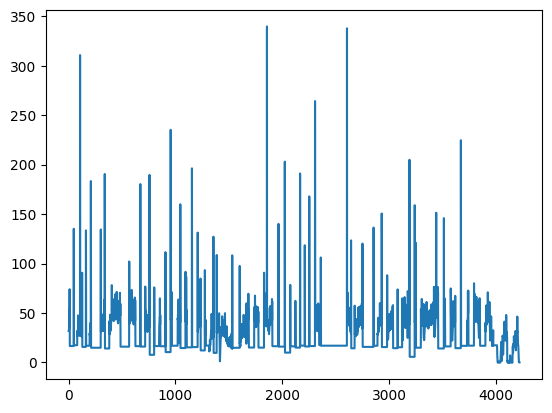

In [5]:
plt.plot(datos['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae990c3100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae990c3640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae990b1e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae990c3b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae990c3e20>],
 'means': []}

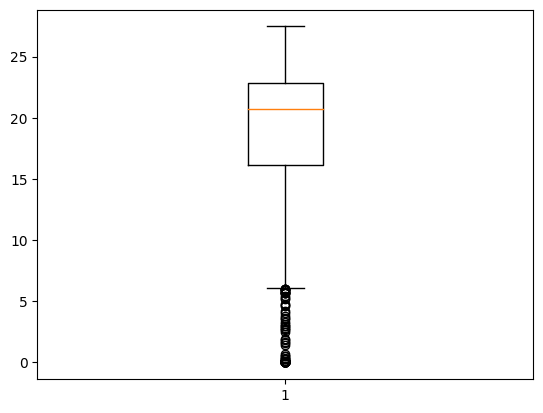

In [6]:
plt.boxplot(datos['velocidad_gps-ms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae993c8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae994b5040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae993c8820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae994b5580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae994b5820>],
 'means': []}

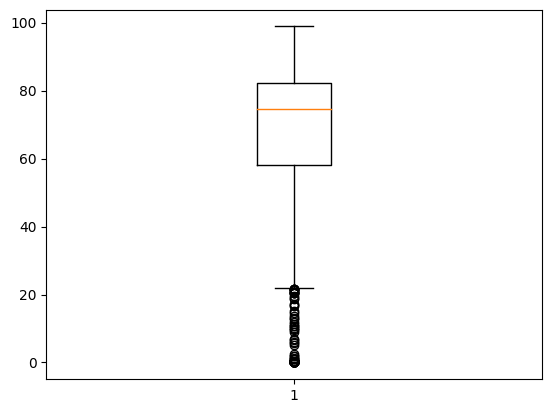

In [7]:
plt.boxplot(datos['velocidad_gps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae996d1b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae996e30a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae996d1640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae996e35e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae996e3880>],
 'means': []}

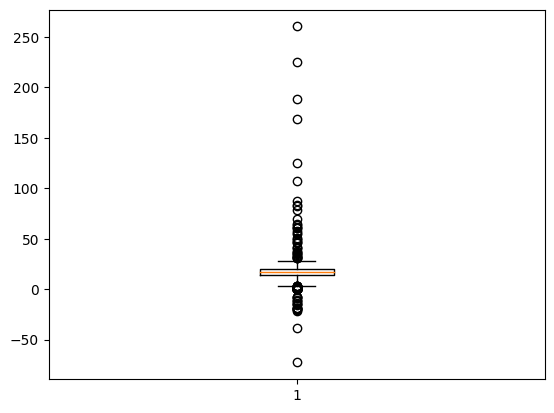

In [8]:
plt.boxplot(datos['velocidad'])

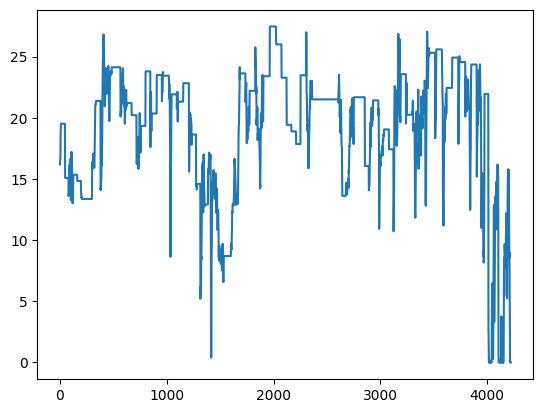

In [9]:
plt.plot(datos['velocidad_gps-ms'])

(array([1.000e+00, 2.000e+01, 4.159e+03, 2.700e+01, 8.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-72.59617199, -39.30224123,  -6.00831048,  27.28562028,
         60.57955104,  93.8734818 , 127.16741255, 160.46134331,
        193.75527407, 227.04920482, 260.34313558]),
 <BarContainer object of 10 artists>)

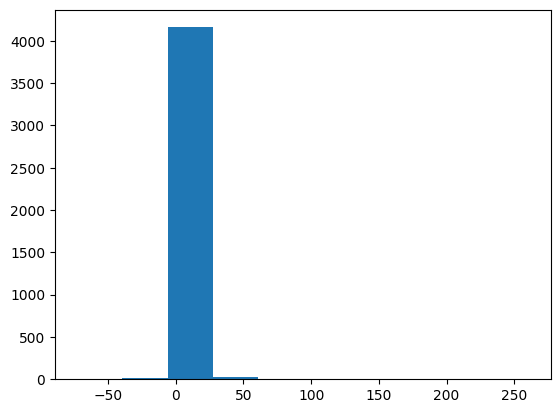

In [10]:
plt.hist(datos['velocidad'])

In [6]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5, rend_motor = 0.30, rend_trans = 0.9, LHV = 432000, densidad_diesel = 840 ):
    
    '''LHV en J/L = (43200 kJ/kg) x (1000 J/kJ) ÷ (0,84 kg/L) = 51428571.43 J/L '''
    
    Fd = (0.5) * densidad_aire * cd * area_front * (datos["velocidad_gps-ms"] ** 2)
    Rx = fr * masa * g * np.cos(np.degrees(np.arctan(datos['slope'])))
    Rg = masa * g *np.sin(np.degrees(np.arctan(datos['slope'])))
    Ri = masa * datos['aceleracion_gps']
    
    datos['fd'] = Fd
    datos['Rx'] = Rx
    datos['Rg'] = Rg
    datos['Ri'] = Ri

    fx = Fd + Rx + Rg + Ri
    
    datos['fx'] = fx

    potencia_rueda = fx * datos["velocidad_gps-ms"]
    
    datos['potencia_rueda'] = potencia_rueda

    potencia_motor = potencia_rueda / (rend_motor * rend_trans)
    
    datos['potencia_motor'] = potencia_motor

    caudal_inst = potencia_motor / (LHV * densidad_diesel )

    datos['caudal_inst'] = caudal_inst * 3600

    return datos

In [7]:
datos_energia = est_energia(datos)
datos_energia

,latitude,longitude,height,distance,sum_distance,slope,date,utm_x,utm_y,velocidad_gps,...,aceleracion_gps,aceleracion_ms,fd,Rx,Rg,Ri,fx,potencia_rueda,potencia_motor,caudal_inst
0,-3.476898,-79.169502,2321.3,32.028551,32.028551,0.000000,2017/08/15 12:08:40,703350.750076,9.615497e+06,58.28,...,-0.044444,-3.201727e-02,200.043596,249.70400,0.000000,-141.555556,308.192041,4989.286700,1.847884e+04,0.183322
1,-3.477153,-79.169647,2321.3,32.489600,64.518152,0.000000,2017/08/15 12:08:42,703334.581834,9.615468e+06,58.60,...,-0.079167,-2.644750e-02,202.246400,249.70400,0.000000,-252.145833,199.804566,3252.374327,1.204583e+04,0.119502
2,-3.477430,-79.169754,2321.3,32.870444,97.388596,0.000000,2017/08/15 12:08:44,703322.631750,9.615438e+06,59.17,...,-0.102778,-6.281075e-03,206.200021,249.70400,0.000000,-327.347222,128.556799,2112.973830,7.825829e+03,0.077637
3,-3.477718,-79.169830,2321.3,32.960892,130.349487,0.000000,2017/08/15 12:08:46,703314.124281,9.615406e+06,59.91,...,0.000000,-9.039384e-02,211.389887,249.70400,0.000000,0.000000,461.093887,7673.370765,2.841989e+04,0.281943
4,-3.478016,-79.169914,2349.1,34.262563,164.612050,0.811381,2017/08/15 12:08:48,703304.725645,9.615373e+06,59.91,...,0.000000,-4.536569e-02,211.389887,53.19616,30496.479337,0.000000,30761.065384,511915.396437,1.895983e+06,18.809355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,-3.987093,-79.202934,2058.3,0.120590,102985.075008,0.000000,2017/08/15 13:47:45,699520.322587,9.559082e+06,0.00,...,-0.005556,1.293148e-10,0.000000,249.70400,0.000000,-17.694444,232.009556,0.000000,0.000000e+00,0.000000
4217,-3.987094,-79.202934,2058.3,0.120590,102985.195598,0.000000,2017/08/15 13:47:47,699520.322346,9.559082e+06,0.04,...,0.002778,-1.293324e-10,0.000094,249.70400,0.000000,8.847222,258.551316,2.872792,1.063997e+01,0.000106
4218,-3.987095,-79.202934,2058.3,0.120590,102985.316188,0.000000,2017/08/15 13:47:49,699520.322105,9.559081e+06,0.02,...,0.000000,1.293324e-10,0.000024,249.70400,0.000000,0.000000,249.704024,1.387245,5.137943e+00,0.000051
4219,-3.987096,-79.202934,2058.3,0.120590,102985.436778,0.000000,2017/08/15 13:47:51,699520.321864,9.559081e+06,0.02,...,0.002778,-1.763867e-14,0.000024,249.70400,0.000000,8.847222,258.551246,1.436396,5.319984e+00,0.000053


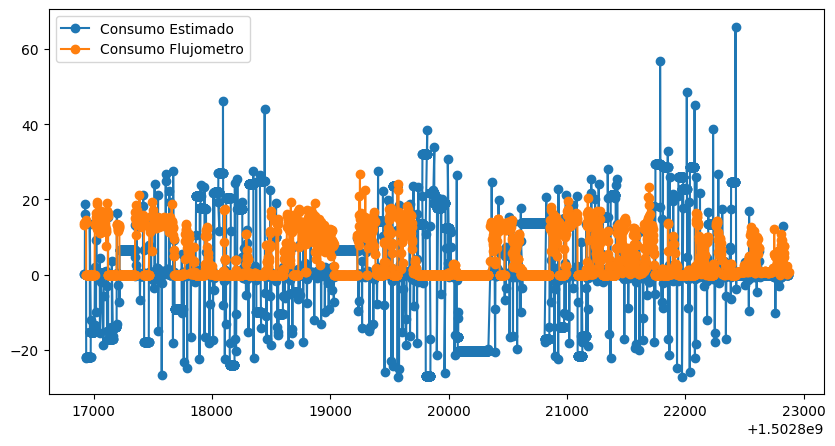

In [8]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia['timestamp'], datos_energia['caudal_inst'],'-o',label='Consumo Estimado')
plt.plot(datos_energia['timestamp'], datos_energia['consumo_inst'], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

In [9]:
datos_energia.columns

Index(['latitude', 'longitude', 'height', 'distance', 'sum_distance', 'slope',
       'date', 'utm_x', 'utm_y', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'timestamp', 'ds', 'velocidad', 'velocidad_gps-ms',
       'next_vel', 'velocidad_ms', 'next_vel_ms', 'aceleracion_gps',
       'aceleracion_ms', 'fd', 'Rx', 'Rg', 'Ri', 'fx', 'potencia_rueda',
       'potencia_motor', 'caudal_inst'],
      dtype='object')

In [10]:
datos_energia_pos = datos_energia.loc[datos_energia['caudal_inst'] > 0]
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
consumo_total_estimado = datos_energia_pos['caudal_inst'].sum()
consumo_total_estimado

/var/folders/5l/lkq4p7sx7v12lgqv9mwfy3nm0000gn/T/ipykernel_1080/938077076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/5l/lkq4p7sx7v12lgqv9mwfy3nm0000gn/T/ipykernel_1080/938077076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.dropna(inplace=True)


33318.541894609385

In [11]:
consumo_total_estimado

33318.541894609385

In [12]:
consumo_total_flujometro  = len(datos_energia.consumo_total) - datos_energia.consumo_total[0]
consumo_total_flujometro

1129.04

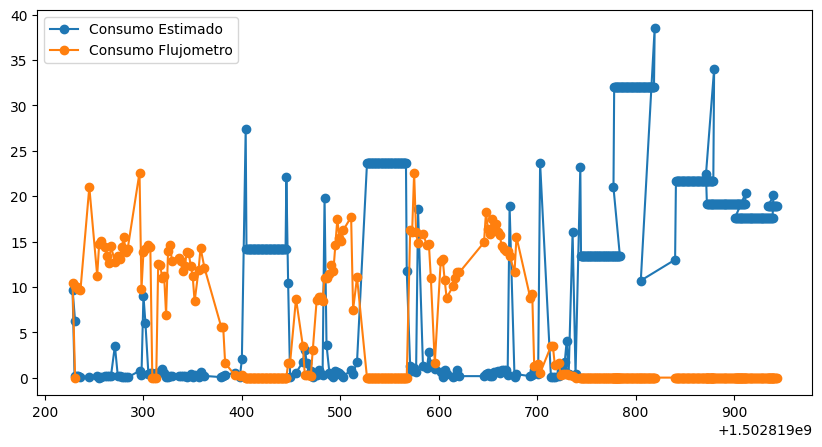

In [13]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['timestamp'][1000:1500], datos_energia_pos['caudal_inst'][1000:1500],'-o',label='Consumo Estimado')
plt.plot(datos_energia_pos['timestamp'][1000:1500], datos_energia_pos['consumo_inst'][1000:1500], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

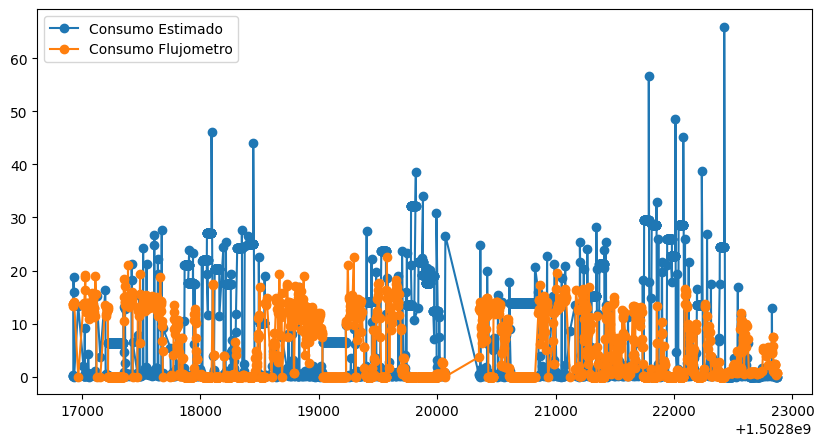

In [14]:
plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['timestamp'], datos_energia_pos['caudal_inst'],'-o',label='Consumo Estimado')
plt.plot(datos_energia_pos['timestamp'], datos_energia_pos['consumo_inst'], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

In [15]:
datos_energia.to_csv('consumo_estimado_corregido_aceleracion.csv', index=False)